In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from explore_functions import *
from acquire import *
from prepare_nlp_josh import *
from modeling import *
from explore_viz import *
import env

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#Extra downloads may be needed to run the NLTK library, uncomment the specific line in the prepare_nlp_josh file

### Acquire and Prepare

In [3]:
#Get a list of github repo names
links = get_links()

In [4]:
#Run this to get new data
df = get_repos(links.href)

In [5]:
#Performs cleaning, tokenization and stemming
df = big_func_to_pre_data(df)

In [6]:
#Additional stopwords
more_stopwords = ['stopswords', 'blackjack', 'java', 'cards', 'split', 'ace', 'variables', 'conditional', 'statements', 'loops', 'functions', 'object-oriented programming', 'syntax', 'comments', 'libraries', 'frameworks']

In [7]:
#Removes stopwords
df['readme_stem_no_swords'] = df['readme_stem'].apply(remove_stopwords, extra_words=more_stopwords)

### Split data

In [8]:
#Seperates data for exploration and testing
train, val, test = train_validate(df)

In [9]:
#Sets global variable to pass into funcitons
target_col = "language"

In [10]:
#Seperates target column for modeling
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test(train, val, test, target_col)

### Explore the data

# What are the most common words in the ReadMe's?

# Does the length of ReadMe's vary among programming languages?

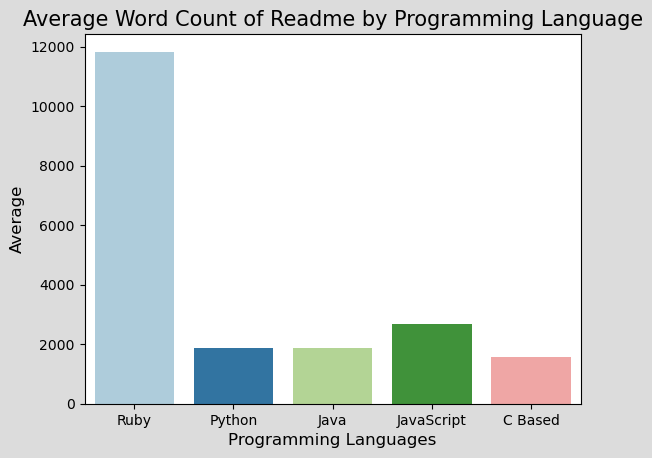

In [11]:
#Explore visuals
explore_visual_1(train)

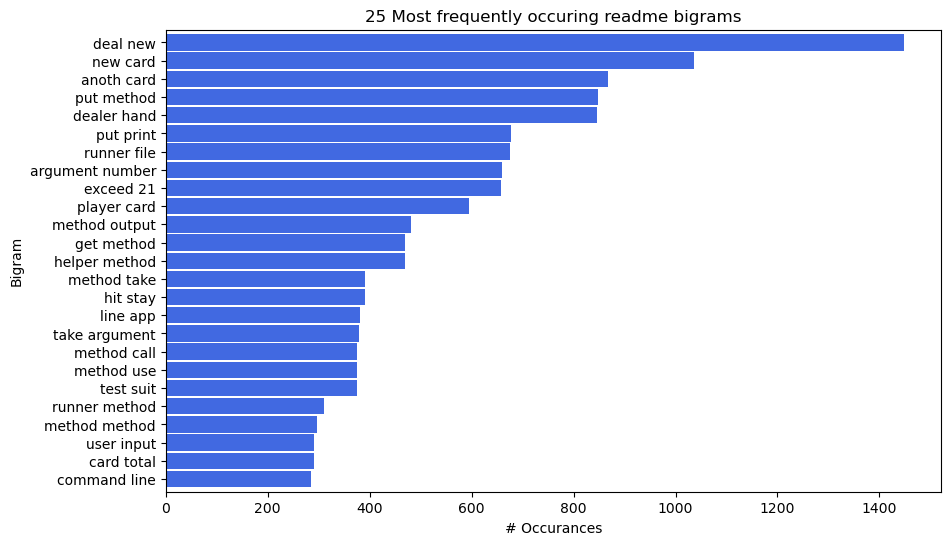

In [12]:
#Explore visuals
explore_visual_2(train)

# Are there any words that uniquely identify a programming language?

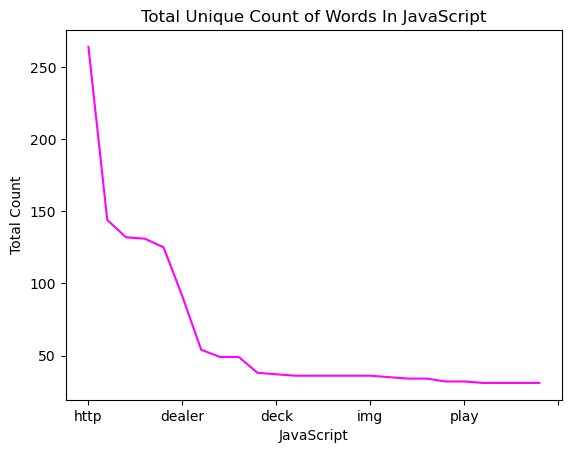

In [13]:
get_js_count_plot()

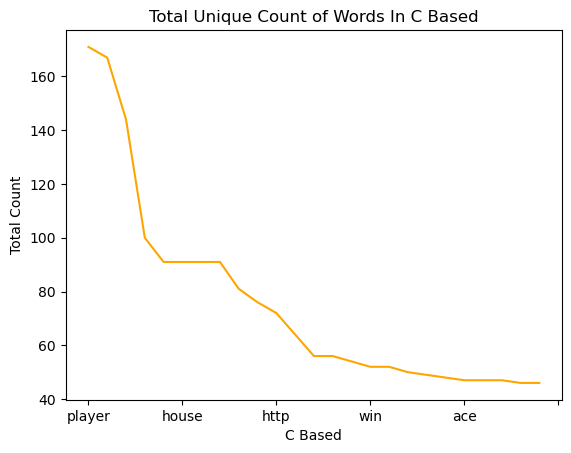

In [14]:
get_c_count_plot()

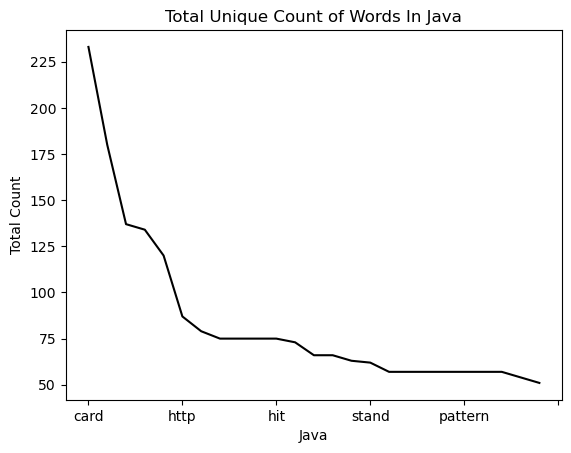

In [15]:
get_java_count_plot()

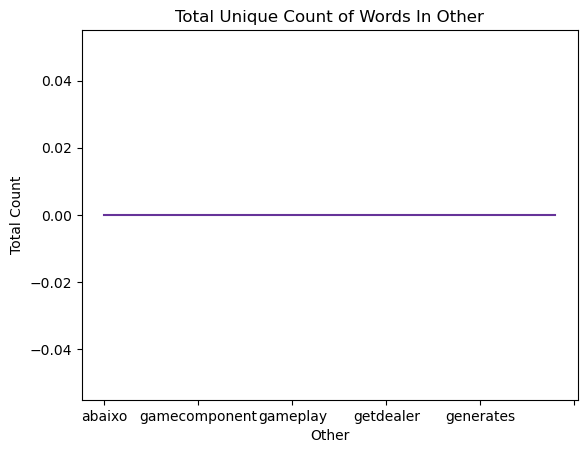

In [16]:
get_other_count_plot()

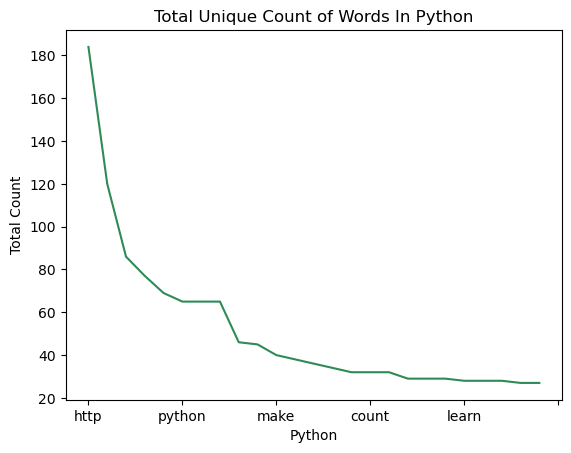

In [17]:
get_python_count_plot()

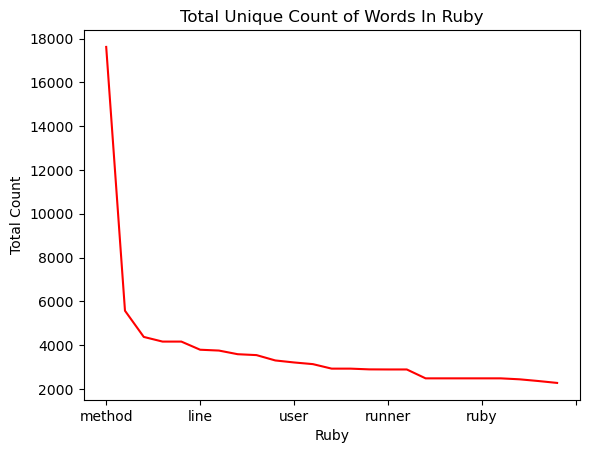

In [18]:
get_ruby_count_plot()

###  Logistic Regression Modeling

In [19]:
#Changes data to numerical for modeling
X_train, X_val, X_test = vectorize_data(X_train, X_val, X_test)

In [20]:
#Runs logistic regression modeling
train_score0, val_score0 = lr_mod(X_train, y_train, X_val, y_val, print_scores = True)

Accuracy for Logistic Regression classifier on training set:   0.9222
Accuracy for Logistic Regression classifier on validation set: 0.7417


### Decision Tree Modeling

In [21]:
#Runs decision tree modeling
train_score1, val_score1 = dec_tree(X_train, y_train, X_val, y_val, print_scores =True)

Accuracy for Decision Tree classifier on training set:   0.8556
Accuracy for Decision Tree classifier on validation set: 0.7667


### Random Forest Modeling

In [22]:
#Runs random forest modeling
train_score2, val_score2 = rand_forest(X_train, y_train, X_val, y_val, print_scores =True)

Accuracy for Random Forest classifier on training set:   0.8056
Accuracy for Random Forest classifier on validation set: 0.7333


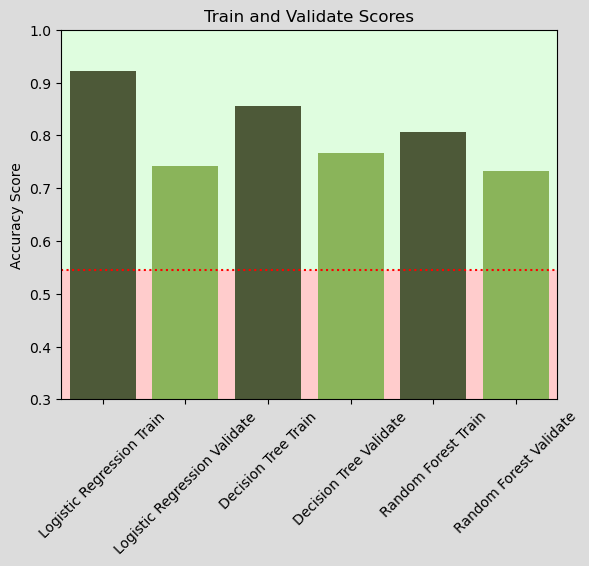

In [23]:
#Plots scores for better visibility
plot_model_scores(train_score0, val_score0, train_score1, val_score1, train_score2, val_score2, y_train)

### Final Test of Decision Tree Model

           Model  Accuracy on Train  Accuracy on Validate  Accuracy on Test
0  Decision Tree             0.8556                0.7667            0.7867


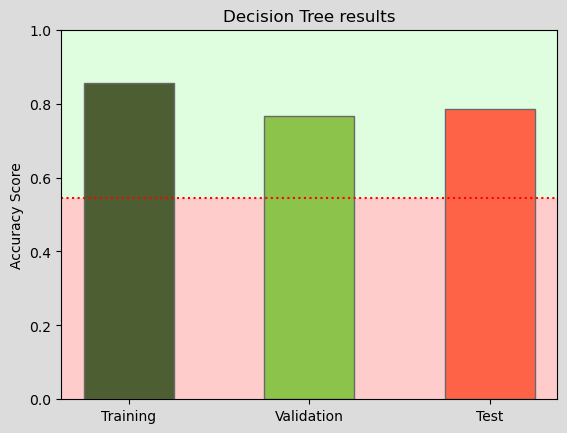

<Figure size 600x600 with 0 Axes>

In [24]:
#Runs final test using best model
final_test(X_train, y_train, X_val, y_val, X_test, y_test)

### Takeaways:

- Ruby was the most used and most common language among our programming languages.
- We removed the languages held in the `Others` category due to the hindrance of the model.
- This model is beating the baseline using our parameters and stopwords.

### Recommendations:

- Model is production worthy.
- Continue looking for more stopwords which could improve performance.

### Next Steps:

- This model took about 380 repo's, more data wouldn't hurt.
- Our "Other" category was a catch-all for the least popular languages. Our model was not successful in this area, why?
- We should explore n-grams, as this may benefit the model!
- Adding more stopwords may be beneficial.
- Identify why our dataset doesn't reflect the underlying population of repos on GitHub.